In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
file = pd.read_csv("dinos.csv")
file

,Species,Weight,Length,Age,TailLength,Height,Width,Gender,Completeness
0,Iguanadon,1650.0,59.0,63.4,68.0,10.8120,7.4800,M,0.545
1,Pterodactyl,145.0,22.0,24.0,25.5,6.3750,3.8250,M,0.531
2,Pterodactyl,820.0,37.1,40.0,42.5,11.1350,6.6300,F,0.661
3,Brachiosaurus,242.0,23.2,25.4,30.0,11.5200,4.0200,F,0.793
4,Pterodactyl,650.0,36.5,39.0,41.4,11.1366,6.0030,M,0.931
...,...,...,...,...,...,...,...,...,...
154,Stegosaurus,7.0,10.1,10.6,11.6,1.7284,1.1484,F,0.557
155,Brachiosaurus,850.0,32.8,36.0,41.6,16.8896,6.1984,F,0.849
156,Pterodactyl,900.0,37.0,40.0,42.5,11.7300,7.2250,M,0.426
157,Plateosaurus,273.0,23.0,25.0,28.0,11.0880,4.1440,F,0.341


In [15]:
file['Iguanadon'] = np.where(file['Species'] == "Iguanadon", 1, 0)
file['Pterodactyl'] = np.where(file['Species'] == "Pterodactyl", 1, 0)
file['Brachiosaurus'] = np.where(file['Species'] == "Brachiosaurus", 1, 0)
file['Plateosaurus'] = np.where(file['Species'] == "Stegosaurus", 1, 0)
file['Vulcanodon'] = np.where(file['Species'] == "Vulcanodon", 1, 0)
file['Stegosaurus'] = np.where(file['Species'] == "Stegosaurus", 1, 0)
file['Raptor'] = np.where(file['Species'] == "Raptor", 1, 0)

d = file.drop("Weight", axis=1)
d = d.drop("Species", axis=1)
d["Gender"] = (d["Gender"]=="M").astype("int16")
d = d.assign(Volume=d["Length"]*d["Height"]*d["Width"])
d = d.drop("Length", axis=1)
d = d.drop("Height", axis=1)
d = d.drop("Width", axis=1)
d = d.drop("TailLength", axis=1) #Equal to Age

d.head()

,Age,Gender,Completeness,Iguanadon,Pterodactyl,Brachiosaurus,Plateosaurus,Vulcanodon,Stegosaurus,Raptor,Volume
0,63.4,1,0.545,1,0,0,0,0,0,0,4771.551840
1,24.0,1,0.531,0,1,0,0,0,0,0,536.456250
2,40.0,0,0.661,0,1,0,0,0,0,0,2738.909355
3,25.4,0,0.793,0,0,1,0,0,0,0,1074.401280
4,39.0,1,0.931,0,1,0,0,0,0,0,2440.134858


In [16]:
d = (d - d.mean(axis = 0)) / d.std(axis = 0)

In [17]:
train, test = np.split(d, [int(0.7*len(d))])
Y, Y_test = np.split(file["Weight"], [int(0.7*len(file["Weight"]))])

In [18]:
Y = file["Weight"]
X = train.to_numpy()
m, n = train.shape

In [19]:
w = np.zeros(n) #parameter vector
b = 0

alpha = 0.0001
lamb = 200000
epochs = 500

totalCost = np.zeros(epochs)
iter = np.linspace(0, epochs-1, epochs)

for i in range(epochs):
    Y_pred = pd.Series(np.zeros(m))

    #exponential curve
    Y_pred = np.exp(X @ w + b * pd.Series(np.ones(m))) 
    
    D_w = (1 / m) * np.sum(Y_pred - Y) * X + (lamb / (2 * m)) * w
    D_b = (1 / m) * np.sum(Y_pred - Y)

    cost = (1 / (2 * m)) * np.sum(pow(Y_pred - Y, 2)) + (lamb / (2 * m)) * np.sum(w ** 2)
    #exp cost = to be figured
    totalCost[i] = cost
    
    w = w - alpha * D_w[1]
    b = b - alpha * D_b

print(w, b)

[-4.83615587e-07  1.05090211e-06 -4.34582092e-08 -4.04813244e-07
  1.58671535e-06 -6.21580819e-07 -3.63541874e-07 -2.31688423e-07
 -3.63541874e-07 -4.43794609e-07 -8.19280304e-07] 5.966727247152191


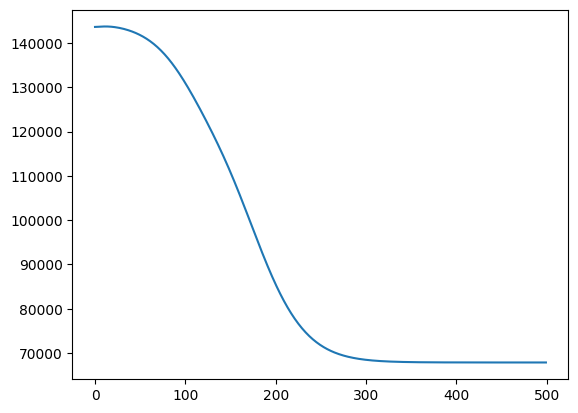

In [20]:
plt.plot(iter, totalCost)
plt.show()

In [21]:

X_test = test.to_numpy()
cols = ["Length", "Age", "Height", "Width", "Gender", "Volume", "Completeness"]
m_test, n_test = test.shape
test.shape

(48, 11)

In [22]:
Y_test_pred = X_test @ w + b
cost_test = (1 / (2 * m_test)) * np.sum(pow(Y_test_pred - Y_test, 2)) 
print(cost_test)

138197.950259406


In [23]:
error_test = abs(Y_test_pred - Y_test)
error_test_p = np.sum(error_test*100/Y_test)
print(error_test_p)

4345.029233012


In [24]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_pred=Y_test_pred, y_true=Y_test))

0.9052144235441667
